# Deep Learning Fundamentals - LU05A Exercise

## 5.0 Multilayer Classifier with Fashion MNIST Dataset
Previously, you have been working with MNIST dataset. Let's try a new dataset this time round.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

`Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot`

## 5.1 Data Preparation

In [1]:
from keras.datasets import fashion_mnist

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# Print out the dimension of the data
print('X_train shape: {}'.format(train_images.shape))
print('y_train shape: {}'.format(train_labels.shape))
print('X_test shape: {}'.format(test_images.shape))
print('y_test shape: {}'.format(test_labels.shape))

4431872/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [2]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 5.2 Display some of the images from the Fashion MNIST dataset

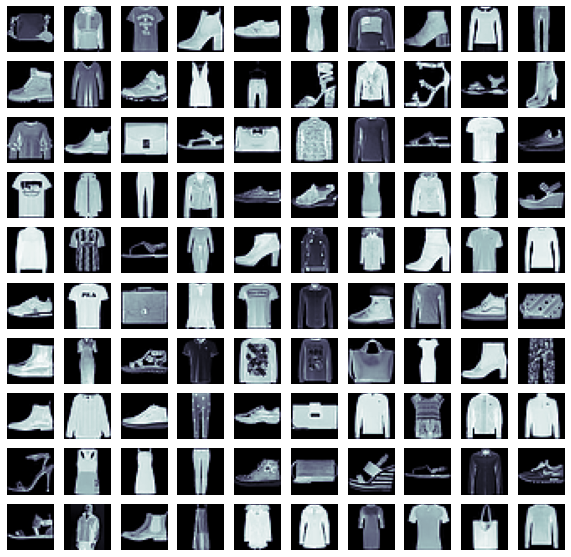

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# >>>>>>>>> below is an example of randomize display of images out of the 60000 training images
i, pos = 0, 1
trgSize = len(train_images)
plt.figure(figsize=(10, 10))
for i in range(0, 100):
    rnd = random.randint(0, trgSize)
    tmp_img = train_images[rnd]
    
    #subplot params: 3-digit integer or three separate integers describing the position of the subplot.
    #nrows, ncols, and index in order, the subplot will take the index position on a grid with 
    #nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.
    plt.subplot(10, 10, pos)
    pos += 1
    plt.imshow(tmp_img, cmap='bone')
    plt.axis('off')
# <<<<<<<<<<<<<< ends here
plt.show()

## 5.3 Display some images with labels

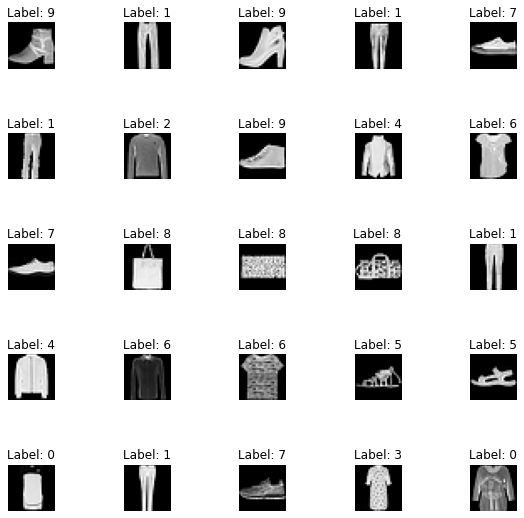

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

pos = 1
starting = random.randint(0, 59975)
plt.figure(figsize=(10, 10))
for i in range(starting, starting+25):
    tmp_img = train_images[i]
    ax = plt.subplot(5*2,5,pos)
    
    if pos%5 == 0:
        pos += 6
    else:
        pos += 1
        
    ax.imshow(tmp_img, cmap='gray')
    ax.axis('off')
    ax.set_title("Label: "+str(train_labels[i]))
    ax.label_outer()
    
plt.xlabel("Image id "+str(starting)+" to "+str(starting+25))
plt.show()

## 5.4 Process the images and labels

In [5]:
from keras.utils.np_utils import to_categorical

# Flatten the image
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))


# One-hot Encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Train images shape: {}".format(train_images.shape))
print("Train labels shape: {}".format(train_labels.shape))
print("Test images shape: {}".format(test_images.shape))
print("Test labels shape: {}".format(test_labels.shape))

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)


In [6]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 5.5 Building your model

Build your model inside the classifer_model function.

1. What is the the input shape for the first layer?
2. What is the output unit for the Dense layer at output layer?

In [7]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense, BatchNormalization, ReLU

def classifier_model():
    # Define the layers
    model = keras.Sequential()
    model.add(Dense(128, input_shape=(784,), activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Print the summary of the model
model = classifier_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## 5.6 Compile your model
1. Compile your model with adam optimizer with a suitable learning rate

In [8]:
import tensorflow as tf

lr = 0.0001
opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history_1 = model.fit(train_images, train_labels, epochs=20, batch_size=128)

loss, acc = model.evaluate(test_images, test_labels)
print('\nTest loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9369 - accuracy: 0.7104
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5662 - accuracy: 0.8158
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.8339
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.8440
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.8502
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8547
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.8583
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8623
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3895 - accuracy: 0.8651
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8688

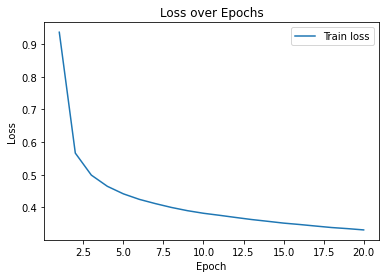

In [10]:
def plot_loss_1(history):
    train_loss = history.history['loss']
    x = list(range(1, len(train_loss) + 1))
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    
plot_loss_1(history_1)  

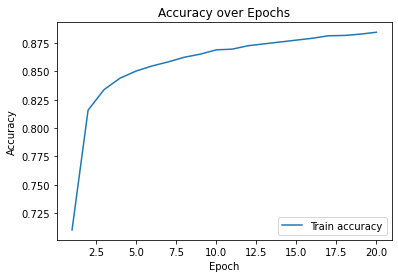

In [11]:
def plot_accuracy_1(history):
    train_acc = history.history['accuracy']
    x = list(range(1, len(train_acc) + 1))
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy_1(history_1)

## Rectify and Save your model
1. Your train and loss plot only shows the train accuracy and train loss. How can this be fixed?
2. Save your model after training

In [12]:
# Rectify this line of code
history_2 = model.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=128)

loss, acc = model.evaluate(test_images, test_labels)
print('\nTest loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

# Save your model
model.save('Fashion_MNIST_model.h5')

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8856 - val_loss: 0.3277 - val_accuracy: 0.8852
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8870 - val_loss: 0.3290 - val_accuracy: 0.8848
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3198 - accuracy: 0.8872 - val_loss: 0.3299 - val_accuracy: 0.8853
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8894 - val_loss: 0.3284 - val_accuracy: 0.8841
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.8898 - val_loss: 0.3246 - val_accuracy: 0.8867
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.8909 - val_loss: 0.3302 - val_accuracy: 0.8820
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.8912 - val_loss: 0.3238 - val_accuracy: 0.8848
Epoch 

## Do a plot of the train and validation accuracy and loss

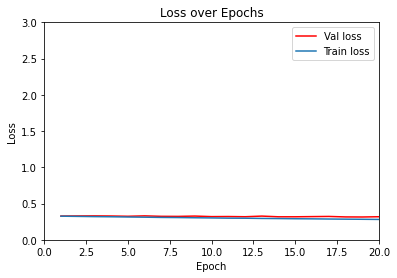

In [13]:
def plot_loss_2(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Val loss')
    plt.plot(x, train_loss, label='Train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xlim([0, 20])
    plt.ylim([0, 3])
    plt.title('Loss over Epochs')
    plt.legend()
    
plot_loss_2(history_2)  

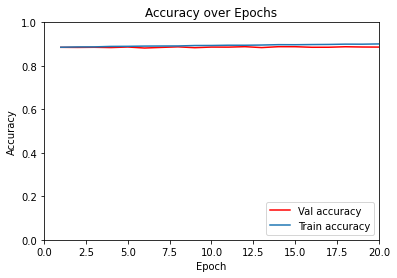

In [14]:
def plot_accuracy_2(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color='red', label='Val accuracy')
    plt.plot(x, train_acc, label='Train accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xlim([0, 20])
    plt.ylim([0, 1])
    plt.title('Accuracy over Epochs')  
    plt.legend(loc='lower right')

plot_accuracy_2(history_2)

## Challenge:

1. Build a model with 2 hidden layers. The first hidden layer has 256 nodes and the second hidden layer has 128 nodes.

2. Include batch norm in each hidden layer.

2. Optimize the model with RMSProp with a learning rate of 0.01.

3. Train the model and plot the train and loss graph.

4. Save your model.

In [15]:
from keras.layers import BatchNormalization, ReLU

def custom_model():
    # Define the layers
    model = keras.Sequential()
    model.add(Dense(256, input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(10, activation='softmax'))
    return model


# Initialize the model
model = custom_model()

# Initialize RMSProp and set the learning rate
lr = 0.01
opt = tf.keras.optimizers.RMSprop(learning_rate=lr)

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_3 = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, batch_size=128)
loss, acc = model.evaluate(test_images, test_labels)
print('\nTest loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4995 - accuracy: 0.8164 - val_loss: 0.4724 - val_accuracy: 0.8343
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3594 - accuracy: 0.8674 - val_loss: 0.4507 - val_accuracy: 0.8423
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.8821 - val_loss: 0.3726 - val_accuracy: 0.8626
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2887 - accuracy: 0.8938 - val_loss: 0.3538 - val_accuracy: 0.8748
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2663 - accuracy: 0.8999 - val_loss: 0.3673 - val_accuracy: 0.8797
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2487 - accuracy: 0.9082 - val_loss: 0.3813 - val_accuracy: 0.8773
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.9139 - val_loss: 0.4913 - val_accuracy: 0.8542
Epoch 

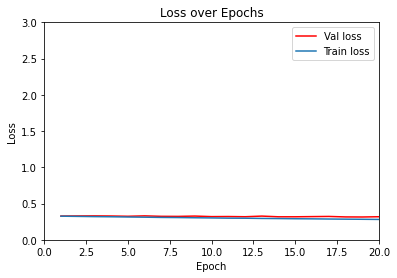

In [16]:
plot_loss_2(history_2) 

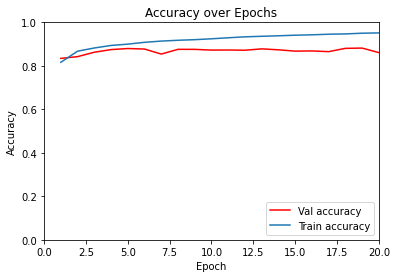

In [17]:
plot_accuracy_2(history_3) 